In [108]:
import pandas as pd

In [109]:
df = pd.read_excel("СПАРК_Выборка_арб_дела_10_40.xlsx", skiprows=3)

In [110]:
df2 = pd.read_excel("СПАРК_Выборка_арб_дела_30_40.xlsx", skiprows=3)

In [111]:
df3 = pd.read_excel("суды с плохими.xlsx", skiprows=3)
df3.head()

,№,Номер дела,Категория,Истец,Ответчик,Третьи лица,Суть иска,Резолютивная часть
0,1,А41-44334/2024,Прочее,"ВОДОКАНАЛ, АО","УК ТЕХКОМСЕРВИС, ООО",NaN,NaN,NaN
1,2,А32-28486/2024,Исполнение обязательств по договорам поставки ...,"АЛЬЯНС, ООО","МОСТОТРЕСТ 2005, ООО",NaN,NaN,NaN
2,3,А19-6546/2024,Исполнение обязательств по договорам энергосна...,"ИРКУТСКЭНЕРГОСБЫТ, ООО","ЛОСК, ООО УК",NaN,NaN,NaN
3,4,А07-16292/2024,Исполнение обязательств по договорам энергосна...,"ГАЗПРОМ МЕЖРЕГИОНГАЗ УФА, ООО","КОАЛИЦИЯ, ООО",NaN,NaN,NaN
4,5,А49-4949/2024,Исполнение обязательств по договорам возмездно...,"ГАЗПРОМ ГАЗОРАСПРЕДЕЛЕНИЕ ПЕНЗА, АО","УК 24/7, ООО",NaN,NaN,NaN


In [112]:
df3.shape

(6162, 8)

In [113]:
df = pd.concat((df, df2, df3), axis=0)
df.head()

,№,Номер дела,Категория,Истец,Ответчик,Третьи лица,Состояние,Исход дела,Суть иска,Резолютивная часть
0,1,А63-11908/2022,Исполнение обязательств по договорам энергосна...,"БУДЁННОВСКЭНЕРГОСБЫТ, АО","РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО","ЭЛЕКТРОСЕТЕВАЯ КОМПАНИЯ, МУП Г.БУДЁННОВСКА",Рассматривается в 1-й инстанции,NaN,о взыскании суммы материального ущерба в разме...,19.03.2024 Судебное заседание арбитражного суд...
1,2,А14-6566/2024,Исполнение обязательств по договорам перевозки,"АРХАНГЕЛЬСКИЙ ЦБК , АЦБК, АО","РЖД, ОАО",NaN,Рассматривается в 1-й инстанции,NaN,NaN,NaN
2,3,А14-6565/2024,Исполнение обязательств по договорам перевозки,"АРХАНГЕЛЬСКИЙ ЦБК , АЦБК, АО","РЖД, ОАО",NaN,Рассматривается в 1-й инстанции,NaN,NaN,NaN
3,4,А75-5913/2022,Исполнение обязательств по договорам подряда,"АКАДЕМПРОЕКТ, ООО","РОССЕТИ ТЮМЕНЬ, АО","СИБЭКСПЕРТ, ООО",Рассматривается в 1-й инстанции,NaN,о понуждении к исполнению обязанности в натуре...,09.02.2024 Отложить судебное разбирательство н...
4,5,А03-4925/2024,Исполнение обязательств по договорам энергосна...,"АЛТАЙЭНЕРГОСБЫТ, АО","РОССЕТИ СИБИРЬ, ПАО",Шипунов Валерий Васильевич,Рассматривается в 1-й инстанции,NaN,об обязании восстановить передачу электрическо...,"22.03.2024 Исковое заявление принять, возбудит..."


In [114]:
df.drop(columns=["Третьи лица", "№"], inplace=True)

df.drop(columns=["Номер дела", "Исход дела", "Состояние"], inplace=True)

In [115]:
df['Категория'] = df['Категория'].fillna(method='ffill')

In [116]:
df['Категория'].isna().sum()

0

In [117]:
df.drop(df[df['Ответчик'].isna() & df['Истец'].isna()].index, inplace=True)

In [118]:
df['Ответчик'] = df['Ответчик'].fillna(method='ffill')
df['Истец'] = df['Истец'].fillna(method='ffill')

In [119]:
df.head()

,Категория,Истец,Ответчик,Суть иска,Резолютивная часть
0,Исполнение обязательств по договорам энергосна...,"БУДЁННОВСКЭНЕРГОСБЫТ, АО","РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО",о взыскании суммы материального ущерба в разме...,19.03.2024 Судебное заседание арбитражного суд...
1,Исполнение обязательств по договорам перевозки,"АРХАНГЕЛЬСКИЙ ЦБК , АЦБК, АО","РЖД, ОАО",NaN,NaN
2,Исполнение обязательств по договорам перевозки,"АРХАНГЕЛЬСКИЙ ЦБК , АЦБК, АО","РЖД, ОАО",NaN,NaN
3,Исполнение обязательств по договорам подряда,"АКАДЕМПРОЕКТ, ООО","РОССЕТИ ТЮМЕНЬ, АО",о понуждении к исполнению обязанности в натуре...,09.02.2024 Отложить судебное разбирательство н...
4,Исполнение обязательств по договорам энергосна...,"АЛТАЙЭНЕРГОСБЫТ, АО","РОССЕТИ СИБИРЬ, ПАО",об обязании восстановить передачу электрическо...,"22.03.2024 Исковое заявление принять, возбудит..."


In [120]:
df.duplicated().sum()

983

In [121]:
df.shape

(17849, 5)

In [122]:
len(df["Истец"].unique())

3864

In [123]:
len(df["Ответчик"].unique())

3523

In [124]:
risks10 = pd.read_excel("СПАРК_Выборка_компаний_20240415_1515.xlsx", skiprows=3)
risks20 = pd.read_excel("СПАРК_Выборка_компаний_20240415_1516.xlsx", skiprows=3)
risks30 = pd.read_excel("СПАРК_Выборка_компаний_20240415_1517.xlsx", skiprows=3)
risks40 = pd.read_excel("СПАРК_Выборка_компаний_20240415_1518.xlsx", skiprows=3)
risks50 = pd.read_excel("СПАРК_Выборка_компаний_20240415_1519.xlsx", skiprows=3)
risks60 = pd.read_excel("СПАРК_Выборка_компаний_20240415_1520.xlsx", skiprows=3)
risks70 = pd.read_excel("плохие_компании.xlsx", skiprows=3)
risks80 = pd.read_excel("нормальные_компании2.xlsx", skiprows=3)

In [125]:
risks = pd.concat([risks10, risks20, risks30, risks40, risks50, risks60, risks70, risks80], axis=0)
risks.shape

(71894, 19)

In [126]:
risks.head()

,№,Наименование,Регистрационный номер,ИДО,ИФР,ИПД,Мои списки,Наименование/ФИО,Код регистрации,Номер налогоплательщика,Код статистики,Страна,Адрес,Отрасль,Руководитель,Выручка,Персонал,Сводный риск,Тип
0,1,"(КОЛХОЗ) ИМЕНИ КУЙБЫШЕВА, СПК",1.026303e+12,1.0,13.0,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,"04КВ, ООО",1.117847e+12,1.0,6.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,"05КОМ, ООО",1.140522e+12,35.0,8.0,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,"1 МПЗ ИМ. В.А. КАЗАКОВА, АО",1.037700e+12,1.0,10.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,"1 СТРОЙЦЕНТР САТУРН-Р, ООО",1.135902e+12,2.0,10.0,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
risks.drop(
    columns=[
        '№', "Мои списки", "Наименование/ФИО", "Код регистрации", "Номер налогоплательщика",
        "Код статистики", "Страна", "Адрес", "Отрасль", "Руководитель", "Выручка", "Персонал",
        "Сводный риск", "Тип"
    ],
    inplace=True
)

In [128]:
risks.head()

,Наименование,Регистрационный номер,ИДО,ИФР,ИПД
0,"(КОЛХОЗ) ИМЕНИ КУЙБЫШЕВА, СПК",1.026303e+12,1.0,13.0,73.0
1,"04КВ, ООО",1.117847e+12,1.0,6.0,77.0
2,"05КОМ, ООО",1.140522e+12,35.0,8.0,98.0
3,"1 МПЗ ИМ. В.А. КАЗАКОВА, АО",1.037700e+12,1.0,10.0,89.0
4,"1 СТРОЙЦЕНТР САТУРН-Р, ООО",1.135902e+12,2.0,10.0,85.0


In [129]:
merged1 = pd.merge(df, risks, left_on='Истец', right_on='Наименование', how='inner')
merged1.rename(columns={"ИДО": "ИДО истец", "ИФР": "ИФР истец", "ИПД": "ИПД истец"}, inplace=True)
#merged.head()

In [130]:
merged1.shape

(19693, 10)

In [131]:
merged1["ИДО истец"].isna().sum()

0

In [132]:
merged1.head()

,Категория,Истец,Ответчик,Суть иска,Резолютивная часть,Наименование,Регистрационный номер,ИДО истец,ИФР истец,ИПД истец
0,Исполнение обязательств по договорам энергосна...,"БУДЁННОВСКЭНЕРГОСБЫТ, АО","РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО",о взыскании суммы материального ущерба в разме...,19.03.2024 Судебное заседание арбитражного суд...,"БУДЁННОВСКЭНЕРГОСБЫТ, АО",1.122651e+12,1.0,12.0,67.0
1,Исполнение обязательств по договорам перевозки,"АРХАНГЕЛЬСКИЙ ЦБК , АЦБК, АО","РЖД, ОАО",NaN,NaN,"АРХАНГЕЛЬСКИЙ ЦБК , АЦБК, АО",1.022901e+12,1.0,18.0,89.0
2,Исполнение обязательств по договорам перевозки,"АРХАНГЕЛЬСКИЙ ЦБК , АЦБК, АО","РЖД, ОАО",NaN,NaN,"АРХАНГЕЛЬСКИЙ ЦБК , АЦБК, АО",1.022901e+12,1.0,18.0,89.0
3,Исполнение обязательств по договорам перевозки,"АРХАНГЕЛЬСКИЙ ЦБК , АЦБК, АО","РЖД, ОАО",NaN,NaN,"АРХАНГЕЛЬСКИЙ ЦБК , АЦБК, АО",1.022901e+12,1.0,18.0,89.0
4,Оспаривание и исполнение решений третейских судов,"АРХАНГЕЛЬСКИЙ ЦБК , АЦБК, АО","РЖД, ОАО",NaN,NaN,"АРХАНГЕЛЬСКИЙ ЦБК , АЦБК, АО",1.022901e+12,1.0,18.0,89.0


In [133]:
risks.shape

(71894, 5)

In [134]:
risks["Наименование"].nunique()

49879

In [135]:
len(merged1["Ответчик"].unique())

3182

In [136]:
merged2 = pd.merge(merged1, risks, left_on='Ответчик', right_on='Наименование', how='inner')
merged2.rename(columns={"ИДО": "ИДО ответчик", "ИФР": "ИФР ответчик", "ИПД": "ИПД ответчик"}, inplace=True)
#merged.head()

In [137]:
merged2.shape

(25325, 15)

In [138]:
merged2.head()

,Категория,Истец,Ответчик,Суть иска,Резолютивная часть,Наименование_x,Регистрационный номер_x,ИДО истец,ИФР истец,ИПД истец,Наименование_y,Регистрационный номер_y,ИДО ответчик,ИФР ответчик,ИПД ответчик
0,Исполнение обязательств по договорам энергосна...,"БУДЁННОВСКЭНЕРГОСБЫТ, АО","РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО",о взыскании суммы материального ущерба в разме...,19.03.2024 Судебное заседание арбитражного суд...,"БУДЁННОВСКЭНЕРГОСБЫТ, АО",1.122651e+12,1.0,12.0,67.0,"РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО",1.062632e+12,1.0,33.0,84.0
1,Исполнение обязательств по договорам энергосна...,"БАЙКАЛЬСКАЯ ЭНЕРГЕТИЧЕСКАЯ КОМПАНИЯ, ООО","РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО",о взыскании денежных средств в общем размере 1...,10.12.2021 Взыскать с ПАО «Россети Северный Ка...,"БАЙКАЛЬСКАЯ ЭНЕРГЕТИЧЕСКАЯ КОМПАНИЯ, ООО",1.133850e+12,1.0,21.0,72.0,"РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО",1.062632e+12,1.0,33.0,84.0
2,Исполнение обязательств по договорам энергосна...,"БГК, ООО","РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО",о взыскании суммы основного долга в размере 11...,27.04.2022 Исковые требования ОБЩЕСТВА С ОГРАН...,"БГК, ООО",1.060277e+12,1.0,11.0,93.0,"РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО",1.062632e+12,1.0,33.0,84.0
3,Исполнение обязательств по договорам энергосна...,"БГК, ООО","РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО",о взыскании суммы основного долга в размере 11...,27.04.2022 Исковые требования ОБЩЕСТВА С ОГРАН...,"БГК, ООО",1.226600e+12,5.0,10.0,99.0,"РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО",1.062632e+12,1.0,33.0,84.0
4,Исполнение обязательств по договорам энергосна...,"БГК, ООО","РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО",о взыскании суммы основного долга в размере 11...,27.04.2022 Исковые требования ОБЩЕСТВА С ОГРАН...,"БГК, ООО",1.103130e+12,4.0,49.0,76.0,"РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО",1.062632e+12,1.0,33.0,84.0


In [139]:
merged2 = merged2.dropna()

In [140]:
merged2 = merged2.drop_duplicates(keep='first')

In [141]:
merged2["Ответчик"].unique().shape

(1164,)

In [142]:
from navec import Navec
from slovnet.model.emb import NavecEmbedding
import torch

path = 'navec_news_v1_1B_250K_300d_100q.tar'  # 51MB
navec = Navec.load(path)  # ~1 sec, ~100MB RAM

words = ["взыскании", "суммы", "материального"]
ids = [navec.vocab[_] for _ in words]

emb = NavecEmbedding(navec)

In [143]:
from nltk.corpus import stopwords
from string import punctuation 
import torch as th

russian_stopwords = stopwords.words("russian")
punctuation = list(punctuation)
punctuation.extend(["«", "»"])
rubbish = []
rubbish.extend(list("1234567890"))
rubbish.extend(punctuation)

def preprocess_text(row):
    row = row.lower()
    for i in rubbish:
        row = row.replace(i, '')
    row = row.split()
    row =  [word for word in row if word not in russian_stopwords]
    ids = [navec.vocab.get(word, navec.vocab.unk_id) for word in row]
    ids = th.tensor(ids)
    return emb(ids).mean(dim=0).tolist()

In [144]:
merged2["Резолютивная часть"] = merged2["Резолютивная часть"].astype(str).apply(preprocess_text)
merged2["Суть иска"] = merged2["Суть иска"].astype(str).apply(preprocess_text)
merged2["Категория"] = merged2["Категория"].astype(str).apply(preprocess_text)

In [145]:
merged2.head()

,Категория,Истец,Ответчик,Суть иска,Резолютивная часть,Наименование_x,Регистрационный номер_x,ИДО истец,ИФР истец,ИПД истец,Наименование_y,Регистрационный номер_y,ИДО ответчик,ИФР ответчик,ИПД ответчик
0,"[-0.03682275861501694, -0.14301779866218567, 0...","БУДЁННОВСКЭНЕРГОСБЫТ, АО","РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО","[-0.16899293661117554, -0.008333242498338223, ...","[-0.0405612476170063, -0.22169026732444763, -0...","БУДЁННОВСКЭНЕРГОСБЫТ, АО",1.122651e+12,1.0,12.0,67.0,"РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО",1.062632e+12,1.0,33.0,84.0
1,"[-0.03682275861501694, -0.14301779866218567, 0...","БАЙКАЛЬСКАЯ ЭНЕРГЕТИЧЕСКАЯ КОМПАНИЯ, ООО","РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО","[-0.15059003233909607, -0.17074720561504364, 0...","[-0.11034753918647766, 0.06430700421333313, 0....","БАЙКАЛЬСКАЯ ЭНЕРГЕТИЧЕСКАЯ КОМПАНИЯ, ООО",1.133850e+12,1.0,21.0,72.0,"РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО",1.062632e+12,1.0,33.0,84.0
2,"[-0.03682275861501694, -0.14301779866218567, 0...","БГК, ООО","РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО","[-0.1765759140253067, -0.1741483211517334, 0.1...","[-0.008421562612056732, 0.016239961609244347, ...","БГК, ООО",1.060277e+12,1.0,11.0,93.0,"РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО",1.062632e+12,1.0,33.0,84.0
3,"[-0.03682275861501694, -0.14301779866218567, 0...","БГК, ООО","РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО","[-0.1765759140253067, -0.1741483211517334, 0.1...","[-0.008421562612056732, 0.016239961609244347, ...","БГК, ООО",1.226600e+12,5.0,10.0,99.0,"РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО",1.062632e+12,1.0,33.0,84.0
4,"[-0.03682275861501694, -0.14301779866218567, 0...","БГК, ООО","РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО","[-0.1765759140253067, -0.1741483211517334, 0.1...","[-0.008421562612056732, 0.016239961609244347, ...","БГК, ООО",1.103130e+12,4.0,49.0,76.0,"РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО",1.062632e+12,1.0,33.0,84.0


In [146]:
merged2.shape

(16737, 15)

In [147]:
companies = pd.concat((merged2["Ответчик"], merged2["Истец"]))

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(companies)

LabelEncoder()

In [148]:
merged2["Ответчик cat"] = le.transform(merged2["Ответчик"])
merged2["Истец cat"] = le.transform(merged2["Истец"])

In [149]:
merged2.head()

,Категория,Истец,Ответчик,Суть иска,Резолютивная часть,Наименование_x,Регистрационный номер_x,ИДО истец,ИФР истец,ИПД истец,Наименование_y,Регистрационный номер_y,ИДО ответчик,ИФР ответчик,ИПД ответчик,Ответчик cat,Истец cat
0,"[-0.03682275861501694, -0.14301779866218567, 0...","БУДЁННОВСКЭНЕРГОСБЫТ, АО","РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО","[-0.16899293661117554, -0.008333242498338223, ...","[-0.0405612476170063, -0.22169026732444763, -0...","БУДЁННОВСКЭНЕРГОСБЫТ, АО",1.122651e+12,1.0,12.0,67.0,"РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО",1.062632e+12,1.0,33.0,84.0,2350,376
1,"[-0.03682275861501694, -0.14301779866218567, 0...","БАЙКАЛЬСКАЯ ЭНЕРГЕТИЧЕСКАЯ КОМПАНИЯ, ООО","РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО","[-0.15059003233909607, -0.17074720561504364, 0...","[-0.11034753918647766, 0.06430700421333313, 0....","БАЙКАЛЬСКАЯ ЭНЕРГЕТИЧЕСКАЯ КОМПАНИЯ, ООО",1.133850e+12,1.0,21.0,72.0,"РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО",1.062632e+12,1.0,33.0,84.0,2350,258
2,"[-0.03682275861501694, -0.14301779866218567, 0...","БГК, ООО","РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО","[-0.1765759140253067, -0.1741483211517334, 0.1...","[-0.008421562612056732, 0.016239961609244347, ...","БГК, ООО",1.060277e+12,1.0,11.0,93.0,"РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО",1.062632e+12,1.0,33.0,84.0,2350,297
3,"[-0.03682275861501694, -0.14301779866218567, 0...","БГК, ООО","РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО","[-0.1765759140253067, -0.1741483211517334, 0.1...","[-0.008421562612056732, 0.016239961609244347, ...","БГК, ООО",1.226600e+12,5.0,10.0,99.0,"РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО",1.062632e+12,1.0,33.0,84.0,2350,297
4,"[-0.03682275861501694, -0.14301779866218567, 0...","БГК, ООО","РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО","[-0.1765759140253067, -0.1741483211517334, 0.1...","[-0.008421562612056732, 0.016239961609244347, ...","БГК, ООО",1.103130e+12,4.0,49.0,76.0,"РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО",1.062632e+12,1.0,33.0,84.0,2350,297


In [150]:
companies = pd.merge(
    pd.DataFrame({"Компания":companies}), risks, left_on='Компания', right_on='Наименование', how='inner'
)
companies.head()

,Компания,Наименование,Регистрационный номер,ИДО,ИФР,ИПД
0,"РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО","РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО",1.062632e+12,1.0,33.0,84.0
1,"РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО","РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО",1.062632e+12,1.0,33.0,84.0
2,"РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО","РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО",1.062632e+12,1.0,33.0,84.0
3,"РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО","РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО",1.062632e+12,1.0,33.0,84.0
4,"РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО","РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО",1.062632e+12,1.0,33.0,84.0


In [151]:
companies = companies.dropna()
companies = companies.drop_duplicates(keep='first', subset=["Компания"])

In [152]:
import dgl
import torch as th

In [153]:
nodes_first_side = merged2["Истец cat"].tolist()
nodes_second_side = merged2["Ответчик cat"].tolist()
G = dgl.DGLGraph((nodes_first_side, nodes_second_side))
G.edata['Категория'] = th.tensor(merged2["Категория"].tolist())
G.edata['Суть иска'] = th.tensor(merged2["Суть иска"].tolist())
G.edata['Резолютивная часть'] = th.tensor(merged2["Резолютивная часть"].tolist())

C:\Users\cosit\anaconda3\lib\site-packages\dgl\heterograph.py:92: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning(


In [154]:
G.nodes()

tensor([   0,    1,    2,  ..., 2478, 2479, 2480])

In [155]:
companies = companies.dropna()
companies = companies.drop_duplicates(keep='first', subset=["Компания"])

In [156]:
companies.shape

(2481, 6)

In [157]:
companies = companies.reset_index().drop(columns=["index"])

In [158]:
companies = companies.drop(columns=["Регистрационный номер"])

In [159]:
companies.head()

,Компания,Наименование,ИДО,ИФР,ИПД
0,"РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО","РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО",1.0,33.0,84.0
1,"РЖД, ОАО","РЖД, ОАО",1.0,39.0,88.0
2,"НПО ТЕХНОХИМ, ООО","НПО ТЕХНОХИМ, ООО",1.0,8.0,97.0
3,"ОФИСМАГ, ООО","ОФИСМАГ, ООО",1.0,9.0,85.0
4,"РОССЕТИ ТЮМЕНЬ, АО","РОССЕТИ ТЮМЕНЬ, АО",1.0,17.0,91.0


In [160]:
companies[companies["Компания"].isin(le.inverse_transform(G.nodes().tolist()))]

,Компания,Наименование,ИДО,ИФР,ИПД
0,"РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО","РОССЕТИ СЕВЕРНЫЙ КАВКАЗ, ПАО",1.0,33.0,84.0
1,"РЖД, ОАО","РЖД, ОАО",1.0,39.0,88.0
2,"НПО ТЕХНОХИМ, ООО","НПО ТЕХНОХИМ, ООО",1.0,8.0,97.0
3,"ОФИСМАГ, ООО","ОФИСМАГ, ООО",1.0,9.0,85.0
4,"РОССЕТИ ТЮМЕНЬ, АО","РОССЕТИ ТЮМЕНЬ, АО",1.0,17.0,91.0
...,...,...,...,...,...
2476,"ГАЛИКА, ООО","ГАЛИКА, ООО",1.0,23.0,94.0
2477,"ГУ ЖКХ, АО","ГУ ЖКХ, АО",3.0,90.0,5.0
2478,"АВАНГАРД-УК, ООО","АВАНГАРД-УК, ООО",1.0,7.0,100.0
2479,"ЖКО, АО","ЖКО, АО",1.0,31.0,39.0


In [161]:
as_in_graph = companies[companies["Компания"].isin(le.inverse_transform(G.nodes().tolist()))]

G.ndata["ИДО"] = th.tensor(as_in_graph["ИДО"].tolist())
G.ndata["ИФР"] = th.tensor(as_in_graph["ИФР"].tolist())
G.ndata["ИПД"] = th.tensor(as_in_graph["ИПД"].tolist())
G.ndata["Название компании"] = th.tensor(as_in_graph["Компания"].apply(preprocess_text).tolist())

In [162]:
G.ndata["Название компании"].shape

torch.Size([2481, 300])

In [163]:
def select_color(row):
    if (row["ИДО"] >= 70) or (row["ИФР"] >= 85) or (row["ИПД"] <= 49):
        return "red"
    elif (40 < row["ИДО"] < 70) or (14 < row["ИФР"] < 85) or ( 49 < row["ИПД"] < 79):
        return "yellow"
    return "green"

In [164]:
colors = companies.apply(select_color, axis=1)
colors = dict(zip(companies['Компания'].tolist(), colors))
values = [colors.get(le.inverse_transform([node])[0], 0.25) for node in G.nodes()]

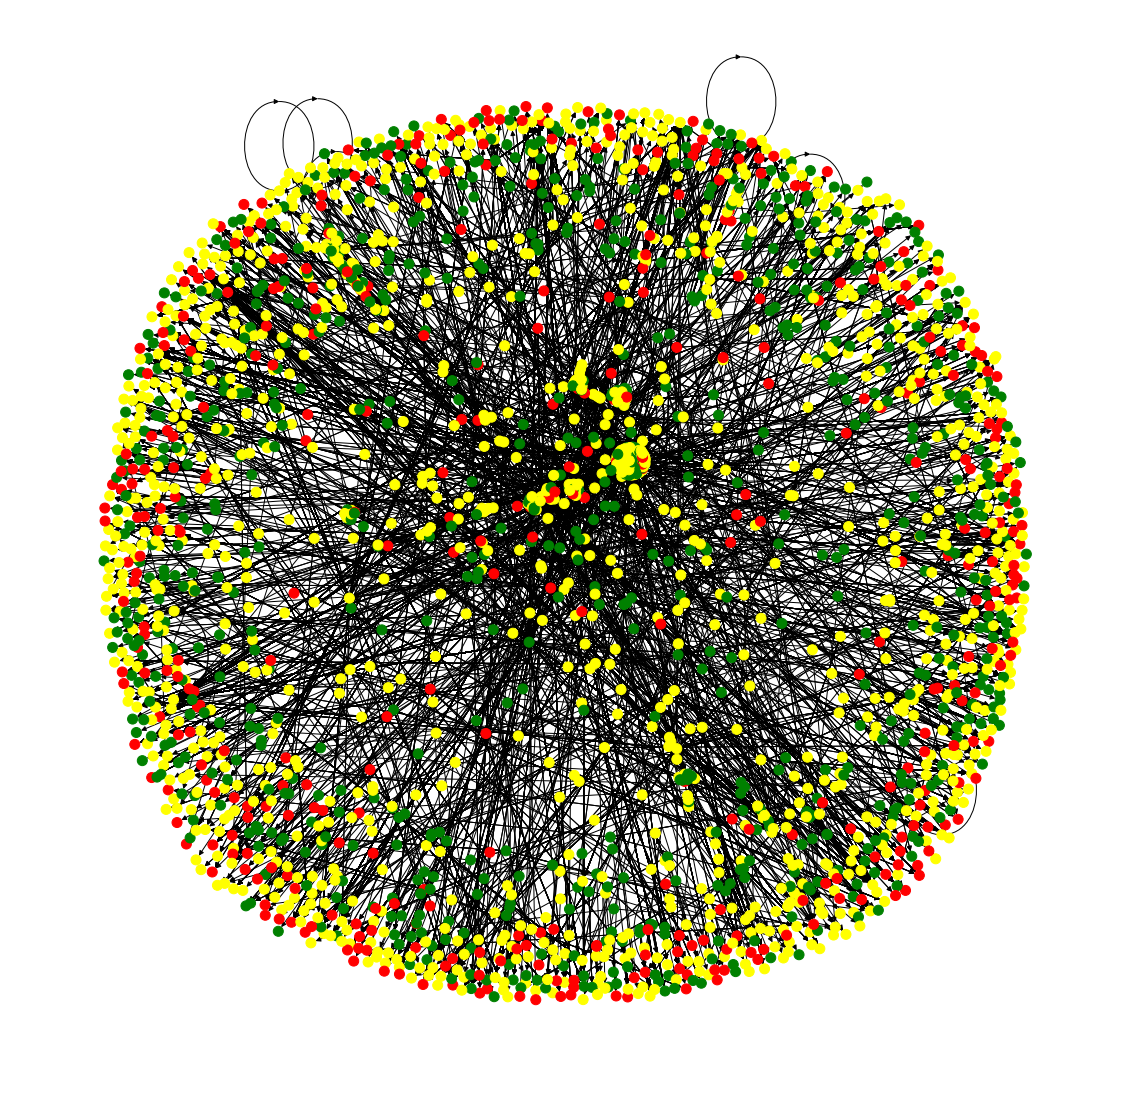

In [87]:
import matplotlib.pyplot as plt
import networkx as nx
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
nx.draw(G.to_networkx(), node_size=100, font_size=7, ax=ax, node_color=values)
plt.show()

In [88]:
pd.DataFrame(colors.values()).value_counts()

yellow    1225
green      838
red        418
dtype: int64

In [58]:
from dgl.nn import EGATConv, GraphConv
from dgl.nn.pytorch.conv import EdgeGATConv
import torch.nn as nn
import torch.nn.functional as F

# идея 1: свертка по ребрам + нодам # далее обычная свертка
# идея 2: свертка отдельно по ребрам и отдельно по нодам, далее EGATConv
# идея 3 + 4: просто EGATConv и просто EdgeGATConv

In [90]:
class GCN(nn.Module):
    def __init__(
        self,
        in_node_feats,
        in_edge_feats,
        out_feats_conc,
        out_feats,
        num_heads
    ): 
        super(GCN, self).__init__()
        self.conv1 = EdgeGATConv(in_node_feats, in_edge_feats, out_feats_conc, num_heads)
        self.conv2 = GraphConv(out_feats_conc, out_feats)

    def forward(self, g, node_feats, edge_feats):
        h = self.conv1(g, node_feats, edge_feats) 
        h = h.mean(dim=1)
        h = h.relu()
        h = self.conv2(g, h)
        return h

In [91]:
model = GCN(in_node_feats=G.ndata["Название компании"].shape[1],
            in_edge_feats=G.edata["Суть иска"].shape[1] * 3,
            out_feats_conc=2224,
            out_feats=3,
            num_heads=3)

optimizer = th.optim.Adam(model.parameters(), lr=0.01)
crit = nn.MSELoss()

g = dgl.add_self_loop(G, fill_data='mean')
edge_features = th.cat((g.edata["Суть иска"], g.edata["Категория"], g.edata["Резолютивная часть"]), dim=1)
node_features = g.ndata["Название компании"]
ratings = th.stack((g.ndata["ИДО"], g.ndata["ИФР"], g.ndata["ИПД"])).T

for e in range(30):
    logits = model(g, node_features, edge_features)
    loss = crit(logits, ratings)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"In epoch {e}, loss: {loss:.3f}")

In epoch 0, loss: 3019.887
In epoch 1, loss: 1530.020
In epoch 2, loss: 2017.796
In epoch 3, loss: 1471.482
In epoch 4, loss: 1264.097
In epoch 5, loss: 1407.810
In epoch 6, loss: 1456.516
In epoch 7, loss: 1355.909
In epoch 8, loss: 1195.580
In epoch 9, loss: 1104.687
In epoch 10, loss: 1157.746
In epoch 11, loss: 1245.432
In epoch 12, loss: 1214.644
In epoch 13, loss: 1122.306
In epoch 14, loss: 1084.623
In epoch 15, loss: 1111.407
In epoch 16, loss: 1150.827
In epoch 17, loss: 1161.848
In epoch 18, loss: 1136.085
In epoch 19, loss: 1093.560
In epoch 20, loss: 1066.913
In epoch 21, loss: 1074.832
In epoch 22, loss: 1098.484
In epoch 23, loss: 1101.608
In epoch 24, loss: 1079.374
In epoch 25, loss: 1057.565
In epoch 26, loss: 1053.944
In epoch 27, loss: 1063.467
In epoch 28, loss: 1071.494
In epoch 29, loss: 1068.624


In [94]:
class GNECN(nn.Module):
    def __init__(
        self,
        in_node_feats,
        in_edge_feats,
        out_node_feats,
        out_edge_feats,
        out_feats,
        num_heads
    ): 
        super().__init__()
        self.conv1 = EGATConv(in_node_feats, in_edge_feats, out_node_feats, out_edge_feats, num_heads)
        self.conv2 = EdgeGATConv(out_node_feats, out_edge_feats, out_feats, num_heads=1)

    def forward(self, g, node_feats, edge_feats):
        h, f = self.conv1(g, node_feats, edge_feats) 
        h, f = h.mean(dim=1), f.mean(dim=1)
        h, f = h.relu(), f.relu()
        h = self.conv2(g, h, f)
        return h.squeeze(1)

In [95]:
model = GNECN(in_node_feats=G.ndata["Название компании"].shape[1],
            in_edge_feats=G.edata["Суть иска"].shape[1] * 3,
            out_node_feats=527,
            out_edge_feats=2225,
            out_feats=3,
            num_heads=3)

optimizer = th.optim.Adam(model.parameters(), lr=0.01)
crit = nn.MSELoss()

g = dgl.add_self_loop(G, fill_data='mean')
edge_features = th.cat((g.edata["Суть иска"], g.edata["Категория"], g.edata["Резолютивная часть"]), dim=1)
node_features = g.ndata["Название компании"]
ratings = th.stack((g.ndata["ИДО"], g.ndata["ИФР"], g.ndata["ИПД"])).T

for e in range(30):
    logits = model(g, node_features, edge_features)
    loss = crit(logits, ratings)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"In epoch {e}, loss: {loss:.3f}")

In epoch 0, loss: 3019.976
In epoch 1, loss: 1040.901
In epoch 2, loss: 1120.485
In epoch 3, loss: 668.784
In epoch 4, loss: 683.204
In epoch 5, loss: 758.978
In epoch 6, loss: 657.144
In epoch 7, loss: 595.431
In epoch 8, loss: 644.872
In epoch 9, loss: 673.805
In epoch 10, loss: 628.331
In epoch 11, loss: 585.807
In epoch 12, loss: 591.441
In epoch 13, loss: 614.548
In epoch 14, loss: 612.259
In epoch 15, loss: 583.895
In epoch 16, loss: 561.957
In epoch 17, loss: 568.078
In epoch 18, loss: 582.997
In epoch 19, loss: 577.801
In epoch 20, loss: 559.024
In epoch 21, loss: 550.768
In epoch 22, loss: 557.541
In epoch 23, loss: 562.015
In epoch 24, loss: 553.490
In epoch 25, loss: 541.568
In epoch 26, loss: 538.973
In epoch 27, loss: 543.524
In epoch 28, loss: 542.960
In epoch 29, loss: 534.811


In [96]:
logits.clip(min=1, max=100)

tensor([[ 4.0328, 31.2860, 68.5247],
        [ 8.0962, 59.7867, 78.8489],
        [ 5.8643, 29.8596, 76.1443],
        ...,
        [ 1.0000, 31.4471, 83.3140],
        [ 1.0000, 30.7476, 85.5567],
        [ 3.2605, 30.2726, 57.5060]], grad_fn=<ClampBackward1>)

In [95]:
ratings

tensor([[  1.,  33.,  84.],
        [  1.,  39.,  88.],
        [  1.,   8.,  97.],
        ...,
        [  1.,   7., 100.],
        [  1.,  31.,  39.],
        [  1.,  30.,  55.]])

In [165]:
def get_rating(row):
    if (row["ИДО"] >= 70) or (row["ИФР"] >= 85) or (row["ИПД"] <= 49):
        return 2 # высокий риск
    elif (40 < row["ИДО"] < 70) or (14 < row["ИФР"] < 85) or ( 49 < row["ИПД"] < 79):
        return 1 # средний риск
    return 0 # низкий ризк

In [166]:
ratings_cat = companies.apply(get_rating, axis=1)
G.ndata["rating"] = th.tensor(ratings_cat.tolist())

In [167]:
G.ndata["rating"]

tensor([1, 1, 0,  ..., 0, 2, 1])

In [168]:
class GNECNClassificator(nn.Module):
    def __init__(
        self,
        in_node_feats,
        in_edge_feats,
        out_node_feats,
        out_edge_feats,
        out_feats,
        num_heads
    ): 
        super().__init__()
        self.conv1 = EGATConv(in_node_feats, in_edge_feats, out_node_feats, out_edge_feats, num_heads)
        self.conv2 = EdgeGATConv(out_node_feats, out_edge_feats, out_feats, num_heads=1)

    def forward(self, g, node_feats, edge_feats):
        h, f = self.conv1(g, node_feats, edge_feats) 
        h, f = h.mean(dim=1), f.mean(dim=1)
        h = self.conv2(g, h, f)
        return h.squeeze(1)

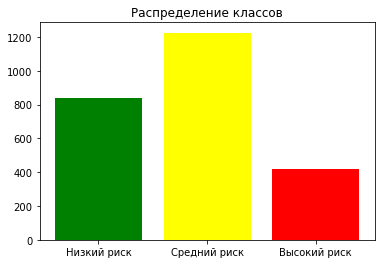

In [187]:
plt.bar(
    ["Низкий риск", "Средний риск", "Высокий риск"],
    [838, 1225, 418],
    color=["green", "yellow", "red"])
plt.title("Распределение классов");

In [169]:
def balanced_data_weights(ratings_cat):
    weights = list(ratings_cat.value_counts())
    return 1 / th.tensor(weights)

In [170]:
model = GNECNClassificator(in_node_feats=G.ndata["Название компании"].shape[1],
            in_edge_feats=G.edata["Суть иска"].shape[1] * 3,
            out_node_feats=527,
            out_edge_feats=2225,
            out_feats=3,
            num_heads=3)

weights = balanced_data_weights(ratings_cat)
optimizer = th.optim.Adam(model.parameters(), lr=0.01)
crit = nn.CrossEntropyLoss(weight=weights)

g = dgl.add_self_loop(G, fill_data='mean')
edge_features = th.cat((g.edata["Суть иска"], g.edata["Категория"], g.edata["Резолютивная часть"]), dim=1)
node_features = g.ndata["Название компании"]
ratings = th.stack((g.ndata["ИДО"], g.ndata["ИФР"], g.ndata["ИПД"])).T

for e in range(30):
    logits = model(g, node_features, edge_features)
    loss = crit(logits, ratings)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"In epoch {e}, loss: {loss:.3f}")

In epoch 0, loss: 0.317
In epoch 1, loss: 4.597
In epoch 2, loss: 3.603
In epoch 3, loss: 1.753
In epoch 4, loss: 3.473
In epoch 5, loss: 0.692
In epoch 6, loss: 1.088
In epoch 7, loss: 1.170
In epoch 8, loss: 1.688
In epoch 9, loss: 0.984
In epoch 10, loss: 0.787
In epoch 11, loss: 0.511
In epoch 12, loss: 0.652
In epoch 13, loss: 0.766
In epoch 14, loss: 0.470
In epoch 15, loss: 0.691
In epoch 16, loss: 0.774
In epoch 17, loss: 0.725
In epoch 18, loss: 0.569
In epoch 19, loss: 0.486
In epoch 20, loss: 0.588
In epoch 21, loss: 0.329
In epoch 22, loss: 0.300
In epoch 23, loss: 0.297
In epoch 24, loss: 0.240
In epoch 25, loss: 0.242
In epoch 26, loss: 0.289
In epoch 27, loss: 0.293
In epoch 28, loss: 0.193
In epoch 29, loss: 0.217


In [171]:
from sklearn.metrics import classification_report

logits = model(g, node_features, edge_features)
print(classification_report(ratings_cat, logits.argmax(dim=1), zero_division=True))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       838
           1       0.12      0.01      0.01      1225
           2       0.16      0.90      0.27       418

    accuracy                           0.15      2481
   macro avg       0.43      0.30      0.09      2481
weighted avg       0.42      0.15      0.05      2481



In [130]:
pd.DataFrame(logits.argmax(dim=1)).value_counts()

2    1713
1     624
0     144
dtype: int64

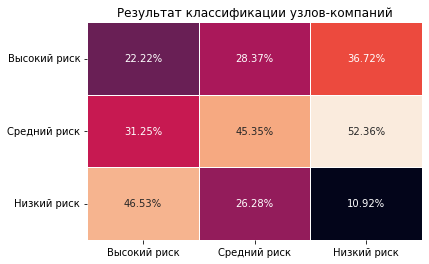

In [156]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap
import matplotlib.pyplot as plt


classes = ["Высокий риск", "Средний риск", "Низкий риск"]
conf_matrix = confusion_matrix(
        ratings_cat, logits.argmax(dim=1)
    )
row_sums = conf_matrix.sum(axis=0, keepdims=True)
norm_conf_matrix = conf_matrix / row_sums

heatmap(
    norm_conf_matrix,
    annot=True,
    fmt=".2%",
    linewidths=1.0,
    cbar=False,
    xticklabels=classes,
    yticklabels=classes
)
plt.title("Результат классификации узлов-компаний");

# Тест

In [179]:
df_test = pd.read_excel("суды с плохими.xlsx", skiprows=3)

df_test.drop(columns=["Третьи лица", "№", "Номер дела"], inplace=True)
df_test['Категория'] = df_test['Категория'].fillna(method='ffill')
df_test['Категория'].isna().sum()
df_test.drop(df_test[df_test['Ответчик'].isna() & df_test['Истец'].isna()].index, inplace=True)
df_test['Ответчик'] = df_test['Ответчик'].fillna(method='ffill')
df_test['Истец'] = df_test['Истец'].fillna(method='ffill')
df_test = df_test.dropna()
df_test = df_test.drop_duplicates(keep='first')

df_test.head()

,Категория,Истец,Ответчик,Суть иска,Резолютивная часть
14,Исполнение обязательств по договорам подряда,"ГАЗПРОМ ГАЗОРАСПРЕДЕЛЕНИЕ УФА, ПАО","КРИСТАЛЬНАЯ, ООО УК",о взыскании задолженности в размере 45 295 руб...,"16.04.2024 Исковое заявление принять, возбудит..."
16,Исполнение обязательств по договорам энергосна...,"ИРКУТСКЭНЕРГОСБЫТ, ООО","УКНК, ООО",о взыскании основного долга в размере 106 855 ...,18.04.2024 Отложить судебное разбирательство н...
21,Исполнение обязательств по договорам энергосна...,"ГАЗПРОМ МЕЖРЕГИОНГАЗ УФА, ООО","РОДНОЙ ГОРОД, ООО УК","о взыскании задолженности в размере 403 456,64...",26.04.2024 Исковое заявление общества с ограни...
104,Прочее,"ИНТЕРЛИЗИНГ, ООО","ГОРНОСТРОИТЕЛЬНЫЙ ХОЛДИНГ, ООО","о взыскании 1 835 412,18 руб.",24.11.2023 Принять исковое заявление.\nВозбуди...
109,Исполнение обязательств по договорам подряда,"ГАЗПРОМ ГАЗОРАСПРЕДЕЛЕНИЕ УФА, ПАО","УО АЛЬТАИР ГОРОД СТЕРЛИТАМАК, ООО",о взыскании задолженности в размере 6 615 руб....,"16.04.2024 Исковое заявление принять, возбудит..."


In [180]:
merged1_test = pd.merge(df_test, risks, left_on='Истец', right_on='Наименование', how='inner')
merged1_test.rename(columns={"ИДО": "ИДО истец", "ИФР": "ИФР истец", "ИПД": "ИПД истец"}, inplace=True)

In [181]:
merged_test = pd.merge(merged1_test, risks, left_on='Ответчик', right_on='Наименование', how='inner')
merged_test.rename(columns={"ИДО": "ИДО ответчик", "ИФР": "ИФР ответчик", "ИПД": "ИПД ответчик"}, inplace=True)
#merged.head()

In [190]:
companies_test = pd.concat((merged_test["Ответчик"], merged_test["Истец"]))

In [191]:
companies_test.head()

0    КРИСТАЛЬНАЯ, ООО УК
1    КРИСТАЛЬНАЯ, ООО УК
2    КРИСТАЛЬНАЯ, ООО УК
3    КРИСТАЛЬНАЯ, ООО УК
4    КРИСТАЛЬНАЯ, ООО УК
dtype: object

In [184]:
merged_test["Резолютивная часть"] = merged_test["Резолютивная часть"].astype(str).apply(preprocess_text)
merged_test["Суть иска"] = merged_test["Суть иска"].astype(str).apply(preprocess_text)
merged_test["Категория"] = merged_test["Категория"].astype(str).apply(preprocess_text)

In [185]:
merged_test["Ответчик cat"] = le.transform(merged_test["Ответчик"])
merged_test["Истец cat"] = le.transform(merged_test["Истец"])

In [186]:
nodes_first_side = merged_test["Истец cat"].tolist()
nodes_second_side = merged_test["Ответчик cat"].tolist()
G_test = dgl.DGLGraph((nodes_first_side, nodes_second_side))
G_test.edata['Категория'] = th.tensor(merged_test["Категория"].tolist())
G_test.edata['Суть иска'] = th.tensor(merged_test["Суть иска"].tolist())
G_test.edata['Резолютивная часть'] = th.tensor(merged_test["Резолютивная часть"].tolist())

C:\Users\cosit\anaconda3\lib\site-packages\dgl\heterograph.py:92: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning(


In [187]:
companies = pd.merge(
    pd.DataFrame({"Компания":companies_test}), risks, left_on='Компания', right_on='Наименование', how='inner'
)
companies.head()

,Компания,Наименование,Регистрационный номер,ИДО,ИФР,ИПД
0,"КРИСТАЛЬНАЯ, ООО УК","КРИСТАЛЬНАЯ, ООО УК",1.170280e+12,81.0,99.0,2.0
1,"КРИСТАЛЬНАЯ, ООО УК","КРИСТАЛЬНАЯ, ООО УК",1.170280e+12,73.0,98.0,1.0
2,"КРИСТАЛЬНАЯ, ООО УК","КРИСТАЛЬНАЯ, ООО УК",1.170280e+12,81.0,99.0,2.0
3,"КРИСТАЛЬНАЯ, ООО УК","КРИСТАЛЬНАЯ, ООО УК",1.170280e+12,73.0,98.0,1.0
4,"КРИСТАЛЬНАЯ, ООО УК","КРИСТАЛЬНАЯ, ООО УК",1.170280e+12,81.0,99.0,2.0


In [188]:
companies = companies.dropna()
companies = companies.drop_duplicates(keep='first', subset=["Компания"])

companies.shape

companies = companies.reset_index().drop(columns=["index"])

companies = companies.drop(columns=["Регистрационный номер"])

In [192]:
le = LabelEncoder()
le.fit(companies["Компания"])

LabelEncoder()

In [193]:
as_in_graph = companies[companies["Компания"].isin(le.inverse_transform(G_test.nodes().tolist()))]

In [194]:
G_test.ndata["ИДО"] = th.tensor(as_in_graph["ИДО"].tolist())
G_test.ndata["ИФР"] = th.tensor(as_in_graph["ИФР"].tolist())
G_test.ndata["ИПД"] = th.tensor(as_in_graph["ИПД"].tolist())
G_test.ndata["Название компании"] = th.tensor(as_in_graph["Компания"].apply(preprocess_text).tolist())

In [195]:
G_test

Graph(num_nodes=618, num_edges=5777,
      ndata_schemes={'ИДО': Scheme(shape=(), dtype=torch.float32), 'ИФР': Scheme(shape=(), dtype=torch.float32), 'ИПД': Scheme(shape=(), dtype=torch.float32), 'Название компании': Scheme(shape=(300,), dtype=torch.float32)}
      edata_schemes={'Категория': Scheme(shape=(300,), dtype=torch.float32), 'Суть иска': Scheme(shape=(300,), dtype=torch.float32), 'Резолютивная часть': Scheme(shape=(300,), dtype=torch.float32)})

In [196]:
g_test = dgl.add_self_loop(G_test, fill_data='mean')
edge_features = th.cat((g_test.edata["Суть иска"], g_test.edata["Категория"], g_test.edata["Резолютивная часть"]), dim=1)
node_features = g_test.ndata["Название компании"]
ratings = th.stack((g_test.ndata["ИДО"], g_test.ndata["ИФР"], g_test.ndata["ИПД"])).T

In [98]:
# регрессия
logits = model(g_test, node_features, edge_features)
logits = logits.clip(min=1, max=100)

In [105]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score

print(mean_squared_error(ratings, logits.detach().numpy()))
print(mean_squared_log_error(ratings, logits.detach().numpy()))
print(r2_score(ratings, logits.detach().numpy()))

1633.3667
2.1541562
-0.26135758056846997


In [199]:
# классификация
logits = model(g_test, node_features, edge_features)

In [198]:
true_labels = companies.apply(get_rating, axis=1)
G.ndata["rating"] = th.tensor(ratings_cat.tolist())

C:\Users\cosit\AppData\Local\Temp\ipykernel_12228\3995468290.py:10: RuntimeWarning: invalid value encountered in divide
  norm_conf_matrix = conf_matrix / row_sums


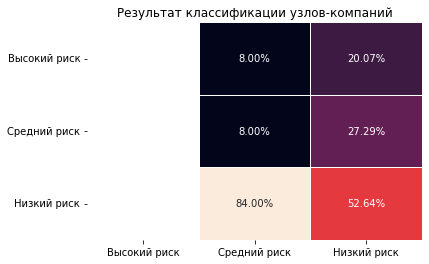

In [200]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap
import matplotlib.pyplot as plt

classes = ["Высокий риск", "Средний риск", "Низкий риск"]
conf_matrix = confusion_matrix(
        true_labels, logits.argmax(dim=1)
    )
row_sums = conf_matrix.sum(axis=0, keepdims=True)
norm_conf_matrix = conf_matrix / row_sums

heatmap(
    norm_conf_matrix,
    annot=True,
    fmt=".2%",
    linewidths=1.0,
    cbar=False,
    xticklabels=classes,
    yticklabels=classes
)
plt.title("Результат классификации узлов-компаний");